# Fitting

In [10]:
import sys
sys.path.insert(0, '../../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle as pkl
import tensorflow as tf

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from kraus_channels import KrausMap, DilutedKrausMap
from loss_functions import ProbabilityMSE, ProbabilityRValue, channel_fidelity_loss, SpectrumDistance
from optimization import ModelSPAM, ModelQuantumMap, Logger, model_saver
from quantum_channel import DilutedChannel, ChoiMapStatic
from quantum_tools import apply_unitary, measurement, resample, state_fidelity, generate_unitary
from experimental import counts_to_probs, generate_pauliInput_circuits, generate_pauli_circuits
from spam import SPAM, InitialState, POVMwQR as POVM, IdealPOVM, IdealInit, povm_fidelity, CorruptionMatrix
from synthetic_data import generate_spam_data, generate_map_data
from utils import saver, loader, train_val_split
from quantum_circuits import pqc_basic
from spectrum import channel_spectrum, mean_spacing, complex_spacing_ratio, coat_spectrum


#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [13]:
n = 4
d = 2**n

num_layer_list = [8,  32,  72,  120]
#big labels
plt.rc('font', size=16)


spectrum_list = []
csr_list = []

for num_layer in num_layer_list:
    model = pkl.load(open(f"models/L={num_layer}.model", "rb"))
    spectrum = channel_spectrum(model[0].channel)
    csr = complex_spacing_ratio(spectrum)

    spectrum_list.append(spectrum)
    csr_list.append(csr)

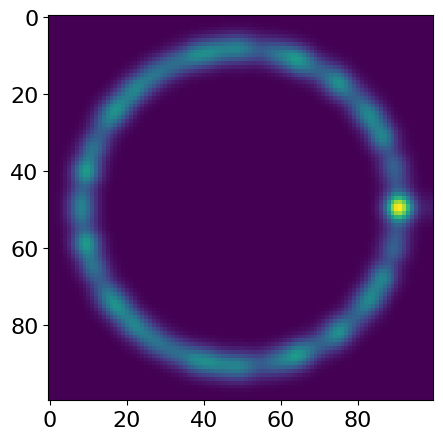

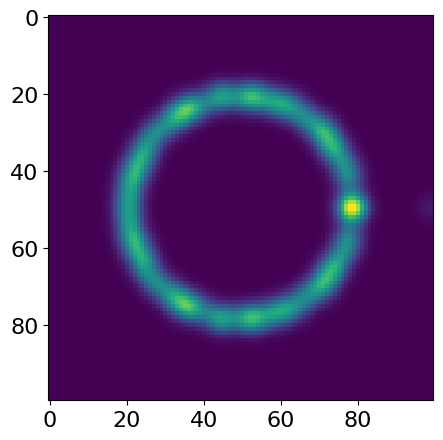

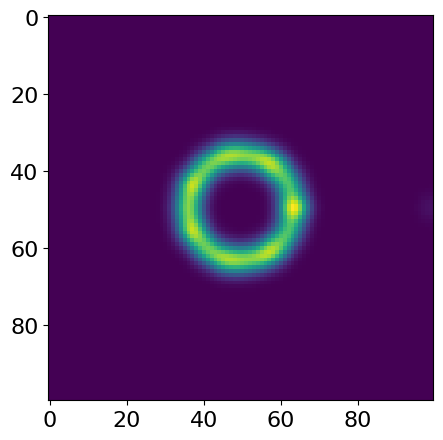

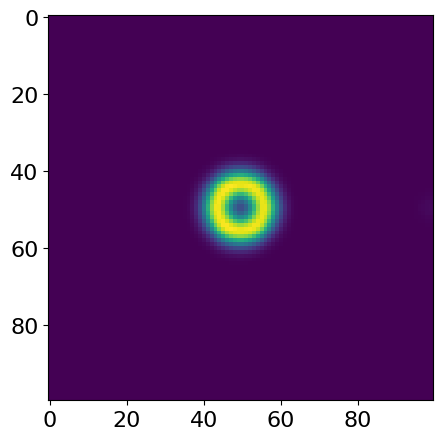

In [17]:
for num_layer, spectrum in zip(num_layer_list, spectrum_list):
    spectrum_coat = coat_spectrum(spectrum, sigma=0.05)
    fig = plt.figure(figsize=(5, 5))
    fig.tight_layout()
    plt.imshow(spectrum_coat)
    plt.savefig(f"figures/spectrum_coat_L={num_layer}.svg")
    
    plt.show()

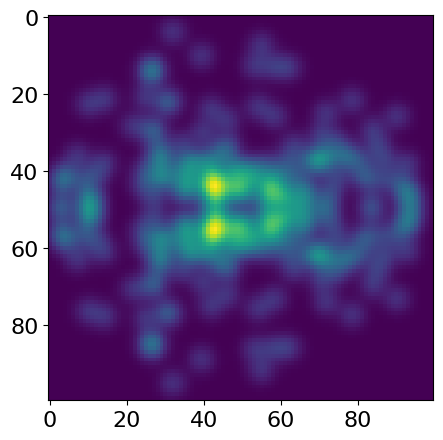

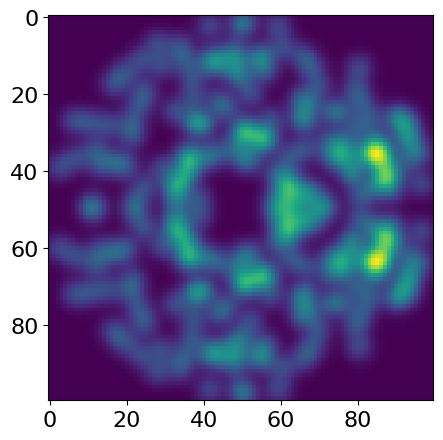

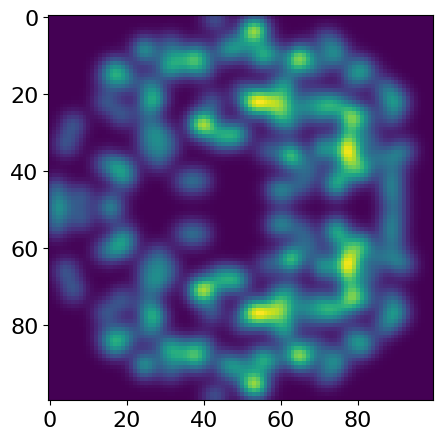

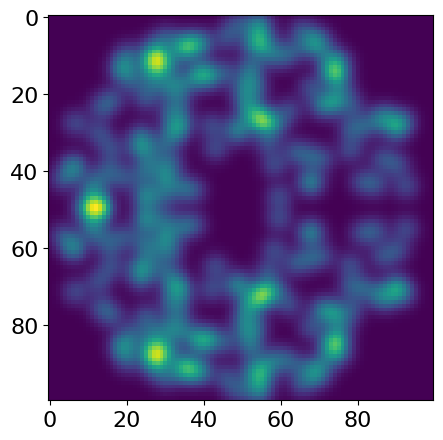

In [20]:
for num_layer, spectrum in zip(num_layer_list, csr_list):
    spectrum_coat = coat_spectrum(spectrum, sigma=0.05)
    fig = plt.figure(figsize=(5, 5))
    fig.tight_layout()
    plt.imshow(spectrum_coat)
    plt.savefig(f"figures/csr_coat_L={num_layer}.svg")
    
    plt.show()